# Plots mit Matplotlib

Wir können mit Numpy nun numerisch Daten auswerten, und um diese zu visualisieren können wir mit dem **Matplotlib** Modul Plots von wissenschaftlicher Qualität erstellen.

Per Konvention importieren wir das PyPlot Submodul von Matplotlib unter dem Namen `plt`:

In [1]:
# Zeige Plots direkt im Jupyter Notebook an
%matplotlib inline
# Anschließend können wir das Modul importieren
import matplotlib.pyplot as plt # Die Abkürzung `plt` ist Konvention
# Numpy brauchen wir immer.
import numpy as np

> **Hinweis:** Matplotlib kann mit verschiedenen _Backends_ arbeiten um Plots zu speichern oder auch interaktiv anzuzeigen. Der Aufruf `%matplotlib inline` konfiguriert das Modul für die **statische Anzeige** von Plots im Jupyter Notebook und muss **vor** dem Import von PyPlot ausgeführt werden. Dabei können auch Anzeigeparameter gesetzt werden:
>
> ```python
> %matplotlib inline
> import matplotlib
> # Setzte Anzeigeparameter, z.B.:
> matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
> import matplotlib.pyplot as plt
> ```
>
> Folgender Aufruf konfiguriert das Jupyter Notebook alternativ für die Verwendung des **interaktiven Backends**:
>
> ```python
> %matplotlib notebook
> ```
>
> Versucht's mal!

## Einfaches Plotten

PyPlot stellt einige grundlegende Funktionen zur Verfügung, mit denen wir Daten schnell plotten können:

- **`plot`** nimmt x- und y-Daten sowie eine Vielzahl von optionalen Argumenten zur Konfiguration an. Fehlen die x-Daten, werden die Indizes der y-Daten verwendet:

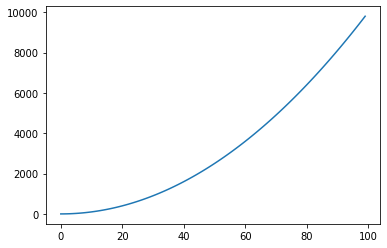

In [2]:
plt.plot(np.arange(100)**2)

Entfernt das '`#`'-Zeichen und schaut euch die Argumente in der Dokumentation an, mit denen wir den Plot konfigurieren können:

In [3]:
#plt.plot?

Matplotlib bietet unzählige Möglichkeiten, das Aussehen von Plots anzupassen! Ihr könnt oben einige ausprobieren, wie bspw. `color`, `linestyle` und `linewidth`.

- **`scatter`** plottet Datenpunkte statt einer Linie:

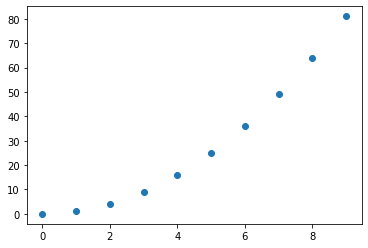

In [4]:
plt.scatter(np.arange(10), np.arange(10)**2)

In [5]:
#plt.scatter?

- **`errorbar`** nimmt zusätzlich Fehler in x- und y-Richtung an und zeichnet Fehlerbalken:

<ErrorbarContainer object of 3 artists>

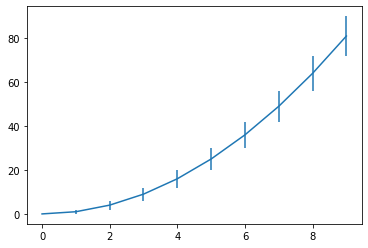

In [6]:
plt.errorbar(np.arange(10), np.arange(10)**2, yerr=np.arange(10))

In [7]:
#plt.errorbar?

- **`hist`** plottet schnell ein Histogramm:

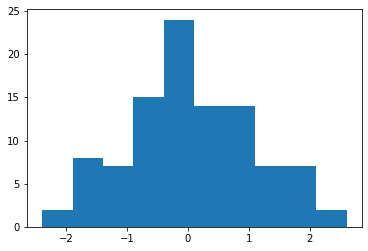

In [8]:
_ = plt.hist(np.random.normal(size=100), bins=10)

In [9]:
#plt.hist?

> **Hinweis:** Alternativ könnt ihr Histogramme mit `numpy.histogram` und `matplotlib.pyplot.bar` plotten. Diese Methode bietet etwas mehr Kontrolle über die Berechnung der Histogrammdaten.

- **`imshow`** visualisiert zweidimensionale Daten:

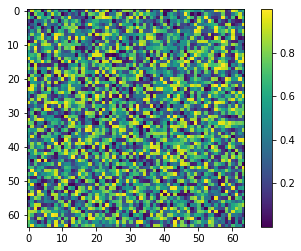

In [10]:
plt.imshow(np.random.random((64, 64)), interpolation='none')
plt.colorbar()

In [11]:
#plt.imshow?

## Plots gestalten

Mit Matplotlib könnt ihr jegliche Plots erstellen, die ihr euch vorstellen könnt. Überlegt euch zuerst, wie der Plot aussehen soll. Die [Gallerie](http://matplotlib.org/gallery.html) kann dabei helfen. Mit einer beherzten Websuche, die meist direkt zur [Dokumentation](http://matplotlib.org/api/pyplot_api.html) führt, findet ihr dann die Funktionen, die ihr braucht.

> **Hinweis:** Plotten ist eine Kunst.

> **Weiterer Hinweis:** Versucht's mal mit `plt.xkcd()`.

### Titel, und Achsen und Legende mit LaTeX

Strings in Matplotlib wie Titel und Achsenbeschriftungen können **LaTeX-Code** enthalten. Text zwischen `$`-Zeichen wird dabei wie gewohnt im _Math-Mode_ gesetzt.

> **Achtung:** Einige Zeichen wie `\t` (`<TAB>`) oder `\n` (`<RETURN>`) werden von Python als Steuerzeichen und daher nicht als LaTeX-Code interpretiert. Markiert Strings, die LaTeX-Code enthalten, daher mit dem Prefix `r` (für _raw_), sodass Steuerzeichen ignoriert werden.

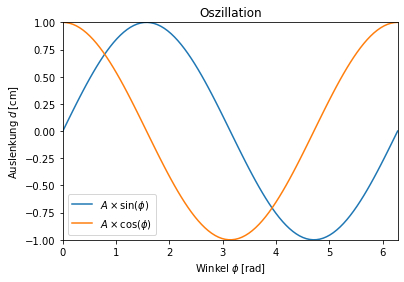

In [12]:
x = np.linspace(0, 2 * np.pi, 100)
# Plot mit Label für Legende
plt.plot(x, np.sin(x), label=r'$A \times \sin(\phi)$')
plt.plot(x, np.cos(x), label=r'$A \times \cos(\phi)$')
# Titel
plt.title('Oszillation')
# Achsenlimits
plt.xlim(0, 2 * np.pi)
plt.ylim(-1, 1)
# Achsenbeschriftungen
plt.xlabel(r'Winkel $\phi \, [\mathrm{rad}]$')
plt.ylabel(r'Auslenkung $d \, [\mathrm{cm}]$')
# Legende
plt.legend(loc='lower left')

## Mehrere Plots in einer Abbildung

Wir können eine Abbildung in ein Gitter mit mehreren Achsen aufteilen. Funktionsaufrufe wie `plt.plot` plotten dann immer in die zuletzt erstellte Achse:

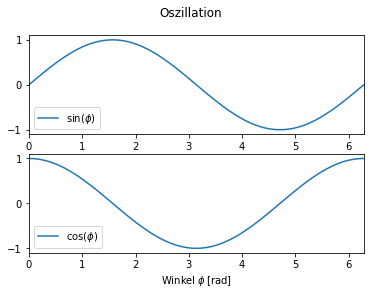

In [13]:
# Erstelle eine Abbildung mit Titel
fig = plt.figure()
fig.suptitle("Oszillation")

# Erstelle eine Achse in einem Gitter von 2 Zeilen und 1 Spalte
ax_upper = plt.subplot(211) # Abkürzung für die 1. Achse im Gitter

# Funktionen plotten nun in diese Achse:
x = np.linspace(0, 2 * np.pi, 100)
plt.plot(x, np.sin(x), label=r'$\sin(\phi)$')
plt.xlim(0, 2 * np.pi)
plt.legend(loc='lower left')

# Erstelle eine zweite Achse im gleichen Gitter, aber an 2. Position
ax_lower = plt.subplot(212, sharex=ax_upper, sharey=ax_upper) # Verwende die gleichen x- und y-Limits wie oben

# Funktionen plotten nun in die zweite Achse:
plt.plot(x, np.cos(x), label=r'$\cos(\phi)$')
plt.xlabel(r'Winkel $\phi \, [\mathrm{rad}]$')
plt.legend(loc='lower left')

> **Hinweis:** Matplotlib arbeitet mit _Abbildungen_ und _Achsen_. Wenn wir solche nicht explizit erstellen, wie im Beispiel oben, werden sie beim Aufrufen von Funktionen wie `plt.plot` automatisch erstellt. Du kannst sie auch jederzeit abrufen:
>
> ```python
> fig = plt.gcf() # die aktuelle Abbildung
> ax = plt.gca() # die aktuelle Achse
> ```
> 
> Wenn du genauer bestimmen willst, auf welche Achse du plotten möchtest, kannst du sie in Funktionsaufrufen auch angeben oder die Achse direkt verwenden:
>
> ```python
> # Explizit auf Achse `ax` plotten:
> plt.plot(x, y, axis=ax) # oder:
> ax.plot(x, y)
> ```

## Plots speichern

Mit `matplotlib.pyplot.savefig` könnt ihr einen Plot als Bilddatei speichern:

In [14]:
plt.savefig('plots/my_plot.png')

<Figure size 432x288 with 0 Axes>

> **Hinweis:** Um einen Plot im **DIN A4-Format** zu speichern könnt ihr dessen Größe und Auflösung anpassen:
>
> ```python
> fig = plt.gcf()
> fig.set_size_inches(11.69, 8.27)
> plt.savefig(filename, dpi=150)
> ```

> **Hinweis:** Um Plots in **LaTeX Dokumente** einzubinden bietet sich das [PGF Vektorformat](https://en.wikipedia.org/wiki/PGF/TikZ) statt Pixelgrafiken wie PNG an. Damit übernimmt LaTeX das Zeichnen des Plots und setzt zudem die enthaltenen Texte selbst, sodass die Fonts und Stile des Dokuments auch im Plot verwendet werden.
>
> Eine Beispiel-Implementierung findet ihr im [TexFig](https://github.com/knly/texfig) Repository.

## Aufgabe 1 - Temperaturen in Heidelberg visualisieren

Wir visualisieren nun die Temperaturdaten mit denen wir schon numerisch gearbeitet haben. Lest die Daten zunächst erneut ein:

In [15]:
# Zelle ausführen, um Daten einzulesen
data = np.loadtxt('data/temperatures.txt')
date, T = data[np.abs(data[:,1]) != 99,:].transpose()

a) Plottet den Temperaturverlauf über den gesamten Zeitraum. Vergesst nicht Titel, Achsenbeschriftungen und Legende.

**Hinweis:** Ihr könnt die Temperatureinheit als `^\circ{}\mathrm{C}` (rendert als $^\circ{}\mathrm{C}$) schreiben.

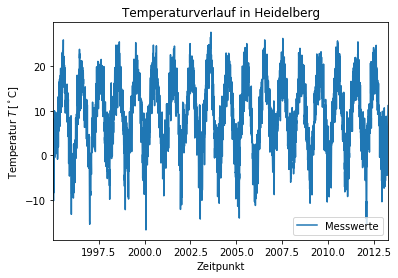

In [16]:
plt.plot(date, T, label='Messwerte')
plt.title('Temperaturverlauf in Heidelberg')
plt.xlim(np.min(date), np.max(date))
plt.xlabel(r'Zeitpunkt')
plt.ylabel(r'Temperatur $T \, [^\circ{}\mathrm{C}]$')
plt.legend()

Sieht dein Plot etwa so aus?

![Temperaturverlauf in Heidelberg](plots/202-1a.png)

In [17]:
# Setze die Variable auf `True` wenn du mit deinem Plot zufrieden bist:
plot_1a_fertig = False

In [18]:
from nose.tools import assert_true
assert_true(plot_1a_fertig, "Versuche dich an Aufgabe 1a, bis du mit deinem Plot zufrieden bist.")
print("Sieht gut aus.")

AssertionError: False is not true : Versuche dich an Aufgabe 1a, bis du mit deinem Plot zufrieden bist.

b) Plottet den kombinierten Jahres-Temperaturverlauf, also die Temperaturdaten aufgetragen über dem Zeitpunkt innerhalb des Jahres.

Plottet nur die Datenpunkte und keine verbindende Linie. Vergesst nicht Titel, Achsenbeschriftungen und Legende.

**Hinweis:** Den Zeitpunkt innerhalb eines Jahres erhaltet ihr wieder mit dem Modulo Operator: `date % 1`

In [ ]:
plt.scatter(date % 1, T, marker='.', label='Messwerte')
plt.title('Jahres-Temperaturverlauf in Heidelberg')
plt.xlim(0, 1)
plt.xlabel(r'Zeitpunkt innerhalb des Jahres')
plt.ylabel(r'Temperatur $T \, [^\circ{}\mathrm{C}]$')
plt.legend()

Sieht dein Plot etwa so aus?

![Jahres-Temperaturverlauf in Heidelberg](plots/202-1b.png)

In [ ]:
# Setze die Variable auf `True` wenn du mit deinem Plot zufrieden bist:
plot_1b_fertig = False

In [ ]:
from nose.tools import assert_true
assert_true(plot_1b_fertig, "Versuche dich an Aufgabe 1b, bis du mit deinem Plot zufrieden bist.")
print("🖼 Wunderschön.")